### Задача

1) кластеризовать регионы Россиии 
2) определить, какие из них наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения
3) описать группы населения, сталкивающиеся с бедностью
4) определить:

◆влияет ли число детей,пенсионеров и других социальноуязвимых групп на уровень бедности в регионе

◆связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе

◆какие ещё зависимости можно наблюдать относительно социально незащищённых слоёв населения

In [3]:
# импортирую библиотеки для анализа данных
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# подготовила словарь для изменения названий регионов
# это оказалось одной из самых сложных задач. в данных присутствовали опечатки и переход на латинские буквы 
regions = {'владимир':'Владимирская область', 'воронежская область':'Воронежская область',
'волгоградская область':'Волгоградская область',
'москва':'г. Москва', 'санкт':'г. Санкт-Петербург', 'севастополь':'г. Севастополь',
'еврейская':'Еврейская автономная область', 'ямало-ненецкий':'Ямало-Ненецкий автономный округ',
'ханты-мансийский':'Ханты-Мансийский автономный округ — Югра',
'ненецкий автономный округ (архангельская область)':'Ненецкий автономный округ',
'ненецкий авт. округ':'Ненецкий автономный округ', 'архангельская область':'Архангельская область', 'чукотский авт. округ':'Чукотский автономный округ',
'тюменская':'Тюменская область', '\nненецкий':'Ненецкий автономный округ', 'ханты-мансийский ао':'Ханты-Мансийский автономный округ — Югра',
'ямало-ненецкий ао':'Ямало-Ненецкий автономный округ', 'тюменская область без автономного округа':'Тюменская область',
'ямало-ненецкий автономный округ':'Ямало-Ненецкий автономный округ', 'bоронежская область':'Воронежская область', 'bладимир':'Владимирская область',
'bологодская': 'Вологодская область', 'bолгоградская область':'Волгоградская область', 'республика саха':'Республика Саха (Якутия)', 
'архангельская обл. без данных по ненецкому авт. окр.':'Архангельская область', 'адыгея':'Республика Адыгея (Адыгея)','башкорт':'Республика Башкортостан',
'бурятия':'Республика Бурятия','дагестан':'Республика Дагестан','ингуш':'Республика Ингушетия', 'кабардино':'Кабардино-Балкарская Республика', 
'карачаево':'Карачаево-Черкесская Республика', 'крым':'Республика Крым', 'республика саха':'Республика Саха (Якутия)', 'северная':'Республика Северная Осетия — Алания',
'татарстан':'Республика Татарстан (Татарстан)', 'тыва':'Республика Тыва (Тува)','чечня':'Чеченская Республика', 'чеченская':'Чеченская Республика',
'чуваш':'Чувашская Республика — Чувашия', 'кемеров':'Кемеровская область — Кузбасс'}

# создаю функцию для унификации названий регионов из разных источников
# чтобы затем, при слиянии таблиц регионы не дублировались

def region_name(region): # подаю на вход значение из признака Регион
    for n in regions: # беру каждый ключ из словаря
        if n in region.lower(): # если этот ключ содержится в region
            return regions[n] # возвращаю значение словаря этого ключа
    return region 

In [5]:
# поработаю с данными о численности населения
population = pd.read_excel('social_russia_data/population.xlsx')
population.drop(population.columns[1:18], axis = 1, inplace=True)
population.drop([0], axis = 0, inplace=True)

# удаляю строки с содержанием федеральный округ, Федерация, район и тд (много лишних строк)
population.drop(population[population['Unnamed: 0'].str.contains('федеральный округ|Федерация|район|сельсовет|все|поссовет|Раздел|пункты')].index, axis = 0, inplace=True)
#убираю лишние пробелы
population.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)

#убираю лишние пробелы
population["Регион"] = population["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
population = population.loc[population.Регион != 'Архангельская область']
population = population.loc[population.Регион != 'Тюменская область']

# Удаляю пропуски, чтобы исключить регионы, в которых прошли реорганизационные изменения
population = population.dropna(axis=0)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
population['Регион'] = population['Регион'].apply(region_name)
#убираю лишние пробелы
population["Регион"] = population["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
population.drop(['23110000100030200002 Численность постоянного населения на 1 января.16', '23110000100030200002 Численность постоянного населения на 1 января.23'], axis = 1, inplace=True)
# переименую столбцы
# я не могла понять данные анализируются на конец года или на начало
# приняла решение, что на конец года
population.rename(columns={'23110000100030200002 Численность постоянного населения на 1 января.17':"2016",
                    '23110000100030200002 Численность постоянного населения на 1 января.18':"2017",
                    '23110000100030200002 Численность постоянного населения на 1 января.19':"2018",
                    '23110000100030200002 Численность постоянного населения на 1 января.20':"2019",
                    '23110000100030200002 Численность постоянного населения на 1 января.21':"2020", 
                    '23110000100030200002 Численность постоянного населения на 1 января.22':"2021"}, 
                    inplace=True)

population["Регион"] = population["Регион"].str.strip()

population.set_index('Регион', inplace=True)

#вычислю среднее значение за 5 лет
population_mean = population.mean(axis=1)


population_mean

Регион
Белгородская область                1548451.0
Брянская область                    1205435.5
Владимирская область                1371904.0
Воронежская область                 2326714.5
Ивановская область                  1009333.5
                                    ...      
Амурская область                795158.166667
Магаданская область             142737.166667
Сахалинская область             488055.666667
Еврейская автономная область    161178.166667
Чукотский автономный округ       49800.833333
Length: 85, dtype: object

In [6]:
# подготовлю данные по детской смертности в сельской местности
child_mort_rural = pd.read_excel('social_russia_data/child_mortality_rural_1990_2021.xls', skiprows=2)

# Оставляю только необходимые признаки
child_mort_rural = pd.DataFrame(child_mort_rural[['Unnamed: 0','2016', '2017', '2018', '2019', '2020', '2021']])
child_mort_rural.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
child_mort_rural["Регион"] = child_mort_rural["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
child_mort_rural = child_mort_rural.loc[child_mort_rural.Регион != 'Архангельская область']
child_mort_rural = child_mort_rural.loc[child_mort_rural.Регион != 'Тюменская область']

# удаляю строки с содержанием федеральный округ|Федерация|район
child_mort_rural.drop(child_mort_rural[child_mort_rural['Регион'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
child_mort_rural = child_mort_rural.dropna(axis=0)
child_mort_rural['Регион'] = child_mort_rural['Регион'].apply(region_name)
#убираю лишние пробелы
child_mort_rural["Регион"] = child_mort_rural["Регион"].str.strip()
# подготовлю данные городов
child_mort_urban = pd.read_excel('social_russia_data/child_mortality_urban_1990_2021.xls', skiprows=2)

# Оставляю только необходимые признаки
child_mort_urban = pd.DataFrame(child_mort_urban[['Unnamed: 0','2016', '2017', '2018', '2019', '2020', '2021']])
child_mort_urban.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
child_mort_urban["Регион"] = child_mort_urban["Регион"].str.strip()

#убираю регионы, которые дублируются впоследствии
child_mort_urban = child_mort_urban.loc[child_mort_urban.Регион != 'Архангельская область']
child_mort_urban = child_mort_urban.loc[child_mort_urban.Регион != 'Тюменская область']

# удаляю строки с содержанием федеральный округ|Федерация|район
child_mort_urban.drop(child_mort_urban[child_mort_urban['Регион'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
child_mort_urban = child_mort_urban.dropna(axis=0)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
child_mort_urban['Регион'] = child_mort_urban['Регион'].apply(region_name)
#убираю лишние пробелы
child_mort_urban["Регион"] = child_mort_urban["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

# объединю данные
child_mort = child_mort_urban.copy()
child_mort['2016'] += child_mort_rural['2016']
child_mort['2017'] += child_mort_rural['2017']
child_mort['2018'] += child_mort_rural['2018']
child_mort['2019'] += child_mort_rural['2019']
child_mort['2020'] += child_mort_rural['2020']
child_mort['2021'] += child_mort_rural['2021']

child_mort.set_index('Регион', inplace=True)

#вычислю значение на душу населения
child_mort_p = child_mort / population

#вычислю среднее значение за 6 лет
child_mort_mean = child_mort_p.mean(axis=1)
child_mort_mean


Регион
Алтайский край                     0.000062
Амурская область                   0.000056
Архангельская область              0.000048
Астраханская область               0.000067
Белгородская область               0.000043
                                     ...   
Ямало-Ненецкий автономный округ    0.000071
Ярославская область                0.000042
г. Москва                          0.000052
г. Санкт-Петербург                 0.000043
г. Севастополь                     0.000041
Length: 85, dtype: object

In [7]:
# подготовлю данные по малоимущему населению по социально-демографическим группам, 17 год

ps_17 = pd.read_excel('social_russia_data/poverty_socdem_2017.xls',skiprows=2)
#убираю регионы, которые дублируются впоследствии
ps_17.drop([21, 62], inplace=True)

# удаляю строки с содержанием федеральный округ|Федерация|район
ps_17.drop(ps_17[ps_17['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
ps_17['Unnamed: 0'] = ps_17['Unnamed: 0'].apply(region_name)
ps_17.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
ps_17["Регион"] = ps_17["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
ps_17.set_index('Регион', inplace=True)
ps_17 = ps_17.fillna(0)

# Вывожу отдельно детей, трудоспособный возраст и старше трудоспособного возраста
ps_17_child = ps_17.loc[:, ['Дети в возрасте до 16 лет']]
ps_17_child.rename(columns={'Дети в возрасте до 16 лет':'2017'},inplace=True)

ps_17_p = ps_17.loc[:, ['Население старше трудоспособного возраста']]
ps_17_p.rename(columns={'Население старше трудоспособного возраста':'2017'},inplace=True)

ps_17_t = ps_17.loc[:, ['Население трудоспособного возраста']]
ps_17_t.rename(columns={'Население трудоспособного возраста':'2017'},inplace=True)


In [8]:
# подготовлю данные по малоимущему населению по социально-демографическим группам, 18 год

ps_18 = pd.read_excel('social_russia_data/poverty_socdem_2018.xls',skiprows=2)
#убираю регионы, которые дублируются впоследствии
ps_18.drop([21, 62], inplace=True)

# удаляю строки с содержанием федеральный округ|Федерация|район
ps_18.drop(ps_18[ps_18['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
ps_18['Unnamed: 0'] = ps_18['Unnamed: 0'].apply(region_name)
ps_18.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
ps_18["Регион"] = ps_18["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
ps_18.set_index('Регион', inplace=True)
ps_18 = ps_18.fillna(0)

# Вывожу отдельно детей, трудоспособный возраст и старше трудоспособного возраста
ps_18_child = ps_18.loc[:, ['Дети в возрасте до 16 лет']]
ps_18_child.rename(columns={'Дети в возрасте до 16 лет':'2018'},inplace=True)

ps_18_p = ps_18.loc[:, ['Население старше трудоспособного возраста']]
ps_18_p.rename(columns={'Население старше трудоспособного возраста':'2018'},inplace=True)

ps_18_t = ps_18.loc[:, ['Население трудоспособного возраста']]
ps_18_t.rename(columns={'Население трудоспособного возраста':'2018'},inplace=True)

ps_18_t

,2018
Регион,
Белгородская область,42.3
Брянская область,57.9
Владимирская область,42.8
Воронежская область,59.4
Ивановская область,59.3
...,...
Амурская область,54.8
Магаданская область,57.8
Сахалинская область,62.8


In [9]:
# подготовлю данные по малоимущему населению по социально-демографическим группам, 19 год

ps_19 = pd.read_excel('social_russia_data/poverty_socdem_2019.xls',skiprows=2)
#убираю регионы, которые дублируются впоследствии
ps_19.drop([21, 62], inplace=True)

# удаляю строки с содержанием федеральный округ|Федерация|район
ps_19.drop(ps_19[ps_19['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
ps_19['Unnamed: 0'] = ps_19['Unnamed: 0'].apply(region_name)
ps_19.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
ps_19["Регион"] = ps_19["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
ps_19.set_index('Регион', inplace=True)
ps_19 = ps_19.fillna(0)

# Вывожу отдельно детей, трудоспособный возраст и старше трудоспособного возраста
ps_19_child = ps_19.loc[:, ['Дети в возрасте до 16 лет']]
ps_19_child.rename(columns={'Дети в возрасте до 16 лет':'2019'},inplace=True)

ps_19_p = ps_19.loc[:, ['Население старше трудоспособного возраста']]
ps_19_p.rename(columns={'Население старше трудоспособного возраста':'2019'},inplace=True)

ps_19_t = ps_19.loc[:, ['Население трудоспособного возраста']]
ps_19_t.rename(columns={'Население трудоспособного возраста':'2019'},inplace=True)
ps_19_t

,2019
Регион,
Белгородская область,0.0
Брянская область,57.4
Владимирская область,60.4
Воронежская область,49.4
Ивановская область,47.5
...,...
Амурская область,58.9
Магаданская область,54.2
Сахалинская область,43.0


In [10]:
# подготовлю данные по малоимущему населению по социально-демографическим группам, 20 год

ps_20 = pd.read_excel('social_russia_data/poverty_socdem_2020.xls',skiprows=2)
ps_20 = ps_20.fillna(0)
#убираю регионы, которые дублируются впоследствии
ps_20.drop([21, 62], inplace=True)

# удаляю строки с содержанием федеральный округ|Федерация|район
ps_20.drop(ps_20[ps_20['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
ps_20['Unnamed: 0'] = ps_20['Unnamed: 0'].apply(region_name)
ps_20.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
ps_20["Регион"] = ps_20["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
ps_20.set_index('Регион', inplace=True)
ps_20 = ps_20.fillna(0)

# Вывожу отдельно детей, трудоспособный возраст и старше трудоспособного возраста
ps_20_child = ps_20.loc[:, ['Дети в возрасте до 16 лет']]
ps_20_child.rename(columns={'Дети в возрасте до 16 лет':'2020'},inplace=True)

ps_20_p = ps_20.loc[:, ['Население старше трудоспособного возраста']]
ps_20_p.rename(columns={'Население старше трудоспособного возраста':'2020'},inplace=True)

ps_20_t = ps_20.loc[:, ['Население трудоспособного возраста']]
ps_20_t.rename(columns={'Население трудоспособного возраста':'2020'},inplace=True)



ps_20_t

,2020
Регион,
Белгородская область,0.0
Брянская область,51.6
Владимирская область,0.0
Воронежская область,69.2
Ивановская область,0.0
...,...
Амурская область,56.9
Магаданская область,0.0
Сахалинская область,0.0


In [11]:
# объединяю 3 датасета
ps_child = ps_17_child.merge(ps_18_child,on=['Регион'],how='left')
ps_child = ps_child.merge(ps_19_child,on=['Регион'],how='left')
ps_child = ps_child.merge(ps_20_child,on=['Регион'],how='left')

ps_p = ps_17_p.merge(ps_18_p,on=['Регион'],how='left')
ps_p = ps_p.merge(ps_19_p,on=['Регион'],how='left')
ps_p = ps_p.merge(ps_20_p,on=['Регион'],how='left')


ps_t = ps_17_t.merge(ps_18_t,on=['Регион'],how='left')
ps_t = ps_t.merge(ps_19_t,on=['Регион'],how='left')
ps_t = ps_t.merge(ps_20_t,on=['Регион'],how='left')

#вычислю среднее значение за 4 года
ps_child_mean = ps_child.mean(axis=1)
ps_p_mean = ps_p.mean(axis=1)
ps_t_mean = ps_t.mean(axis=1)

ps_t_mean

Регион
Белгородская область            21.775
Брянская область                54.775
Владимирская область            39.950
Воронежская область             58.400
Ивановская область              40.675
                                 ...  
Амурская область                56.175
Магаданская область             41.250
Сахалинская область             40.725
Еврейская автономная область    56.225
Чукотский автономный округ      24.850
Length: 85, dtype: float64

In [12]:
# создаю датафрейм для записи в него преступлений из таблиц о годам
data_crimes = pd.read_excel('social_russia_data/crimes/4-EGS_Razdel_1_122022.xls')
data_crimes = data_crimes[['Unnamed: 1']].iloc[15:-9].rename(columns = {'Unnamed: 1': 'Регион'})

data_crimes.set_index('Регион', inplace=True)

#создаю цикл и записываю количество преступлений по годам
dir_name = "social_russia_data/crimes"
test = os.listdir(dir_name)
for item in test:
    if item == '4-EGS_Razdel_1_122016.xls':
        path = 'social_russia_data/crimes/' + item 
        data = pd.read_excel(path)
        data.set_index('Unnamed: 1', inplace=True)
        name = item[17:21]
        data_crimes[name] = data[['Unnamed: 3']].iloc[14:-9].astype(int)

    else:
        path = 'social_russia_data/crimes/' + item 
        data = pd.read_excel(path)
        data.set_index('Unnamed: 1', inplace=True)
        name = item[17:21]
        data_crimes[name] = data[['Unnamed: 3']].iloc[15:-9].astype(int)

# индексы пришлось менять несколько раз из-за нестыковки в игдексах первоначальных данных  
# другого решения не нашла   
data_crimes = data_crimes.reset_index()
# Выявлю строки содержащие федеральный округ, федерация и район (так же другие особенности названий в данной таблице) и исключу
fo = data_crimes[data_crimes['Регион'].str.contains('федеральный округ|Федерация|район|сельсовет|все|поссовет|Раздел|пункты|УТ|Транспорт')].index
data_crimes.drop(fo, axis = 0, inplace=True)

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
data_crimes['Регион'] = data_crimes['Регион'].apply(region_name)
#убираю лишние пробелы
data_crimes["Регион"] = data_crimes["Регион"].str.lstrip().str.replace(r'\s+', ' ', regex=True)


data_crimes.set_index('Регион', inplace=True)
data_crimes.sort_index(axis=1)

#вычислю значение на душу населения
data_crimes_p = data_crimes / population

#вычислю среднее значение за 6 лет
data_crimes_mean = data_crimes_p.mean(axis=1)
data_crimes_mean

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1343341) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (122033) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSA

Регион
Алтайский край                     0.007198
Амурская область                     0.0083
Архангельская область              0.005916
Астраханская область               0.005271
Белгородская область                    NaN
                                     ...   
Ямало-Ненецкий автономный округ    0.004161
Ярославская область                0.004057
г. Москва                          0.001323
г. Санкт-Петербург                 0.002114
г. Севастополь                      0.00271
Length: 85, dtype: object

In [13]:
# подготовлю данные по числу людей с инвалидностью
disabled = pd.read_csv('social_russia_data/disabled_total_by_age_2017_2022.csv')

# удаляю строки с содержанием федеральный округ, Федерация, район и город Байконур
disabled.drop(disabled[disabled['region'].str.contains('Байконур|федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
disabled.rename(columns={'region':"Регион"}, inplace=True)

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
disabled['Регион'] = disabled['Регион'].apply(region_name)
#убираю лишние пробелы
disabled["Регион"] = disabled["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

# Вытащу из  даты год
disabled['date'] = pd.to_datetime(disabled['date']).dt.year
disabled.rename(columns={2017: '2017', 2018: '2018', 2019: '2019', 2020: '2020', 2021: '2021', 2022: '2022'})
# Группирую по региону и финальному кол-ву
disabled = pd.DataFrame(disabled.groupby(['Регион','date'])['total'].sum().unstack())

#вычислю среднее значение за 6 лет
disabled_mean = disabled.loc[:,2017:2020].mean(axis=1)
#вычислю значение на душу населения
disabled_p = disabled_mean / population_mean

disabled_p


Регион
Алтайский край                     0.883453
Амурская область                   0.995345
Архангельская область              0.936312
Астраханская область               0.519441
Белгородская область               1.607097
                                     ...   
Ямало-Ненецкий автономный округ    0.301123
Ярославская область                0.993949
г. Москва                          0.984497
г. Санкт-Петербург                 1.321099
г. Севастополь                     0.537021
Length: 85, dtype: object

In [14]:
# подготовлю данные по валовму региональному продукту на душу населения
df = pd.read_excel('social_russia_data/gross_regional_product_1996_2020.xls', skiprows=2)

# Оставляю только необходимые признаки
gross_product = pd.DataFrame(df[['Unnamed: 0','2016', '2017', '2018', '2019', '2020']])

# удаляю строки с содержанием федеральный округ, Федерация, район
gross_product.drop(gross_product[gross_product['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

gross_product.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
#убираю лишние пробелы
gross_product["Регион"] = gross_product["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
gross_product = gross_product.loc[gross_product.Регион != 'Архангельская область']
gross_product = gross_product.loc[gross_product.Регион != 'Тюменская область']

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
gross_product['Регион'] = gross_product['Регион'].apply(region_name)
#убираю лишние пробелы
gross_product["Регион"] = gross_product["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
gross_product.set_index('Регион', inplace=True)

#вычислю среднее значение за 5 лет
gross_product_mean = gross_product.mean(axis=1)

gross_product_mean

Регион
Белгородская область             578765.06
Брянская область                 304715.44
Владимирская область             357923.42
Воронежская область              405518.16
Ивановская область               232553.00
                                   ...    
Амурская область                 451290.98
Магаданская область             1392228.04
Сахалинская область             2029395.38
Еврейская автономная область     345560.42
Чукотский автономный округ      1780297.36
Length: 85, dtype: float64

In [15]:
# подготовлю данные по размеру жилой площади в расчете на члена домохозяйства
housing_2020 = pd.read_excel('social_russia_data/housing_2020.xlsx')

housing_df = pd.DataFrame(housing_2020[['Регион', 'Размер жилой площади в расчете на члена домохозяйства']])

# удаляю строки с содержанием федеральный округ, Федерация, район
housing_df.drop(housing_df[housing_df['Регион'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
housing_df.rename(columns={'Размер жилой площади в расчете на члена домохозяйства':"2020"}, inplace=True)
#убираю лишние пробелы
housing_df["Регион"] = housing_df["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
housing_df['Регион'] = housing_df['Регион'].apply(region_name)
housing_df["Регион"] = housing_df["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

housing_df.set_index('Регион', inplace=True)
housing_df_mean = housing_df.mean(axis=1)

housing_df_mean

Регион
Белгородская область            17.8
Брянская область                24.1
Владимирская область            16.1
Воронежская область             19.9
Ивановская область              18.1
                                ... 
Амурская область                17.3
Магаданская область             13.8
Сахалинская область             17.2
Еврейская автономная область    13.8
Чукотский автономный округ      14.1
Length: 85, dtype: float64

In [16]:
# подготовлю данные о среднедушевых доходах (в месяц)
cash_real_df = pd.read_excel('social_russia_data/cash_real_income_wages_2015_2020.xlsx')

# 2015 год не попадает в выборку, исключу его
cash_real = pd.DataFrame(cash_real_df[['region', 2016, 2017, 2018, 2019, 2020]])

# удаляю строки с содержанием федеральный округ, Федерация, район и в этой таблице попалось ещё 2 лишние строки
cash_real.drop(cash_real[cash_real['region'].str.contains('числе|федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

# переименую признак региона
cash_real.rename(columns={'region':"Регион"}, inplace=True)
#убираю лишние пробелы
cash_real["Регион"] = cash_real["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
cash_real = cash_real.loc[cash_real.Регион != 'Архангельская область']
cash_real = cash_real.loc[cash_real.Регион != 'Тюменская область']

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
cash_real['Регион'] = cash_real['Регион'].apply(region_name)
cash_real["Регион"] = cash_real["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

cash_real.set_index('Регион', inplace=True)

#вычислю среднее значение за 5 лет
cash_real_mean = cash_real.mean(axis=1)
cash_real_mean

Регион
Белгородская область            31222.4
Брянская область                26533.0
Владимирская область            24147.6
Воронежская область             30634.2
Ивановская область              25022.0
                                 ...   
Амурская область                31385.8
Магаданская область             60442.2
Сахалинская область             54707.6
Еврейская автономная область    25218.8
Чукотский автономный округ      78492.6
Length: 85, dtype: float64

In [17]:
# подготовлю данные по проценту людей, живущих за чертой бедности
poverty_percent = pd.read_csv('social_russia_data/poverty_percent_by_regions_1992_2020.csv')

# удаляю строки с содержанием федеральный округ, Федерация, район
poverty_percent.drop(poverty_percent[poverty_percent['region'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

poverty_percent.rename(columns={'region':"Регион"}, inplace=True)

#убираю лишние пробелы
poverty_percent["Регион"] = poverty_percent["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
poverty_percent = poverty_percent.loc[poverty_percent.Регион != 'Архангельская область']
poverty_percent = poverty_percent.loc[poverty_percent.Регион != 'Тюменская область']


# Изменяю название регионов, для того чтобы потом обьеденить таблицы
poverty_percent['Регион'] = poverty_percent['Регион'].apply(region_name)
#убираю лишние пробелы
poverty_percent["Регион"] = poverty_percent["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

poverty_percent.set_index('Регион', inplace=True)

# Сгруппирую данные
poverty_percent = poverty_percent.groupby(['Регион','year'])['poverty_percent'].sum().unstack()
# Оставлю только необходимые года
poverty_percent.drop(poverty_percent.columns[0:21],axis=1,inplace=True)

#вычислю среднее значение за 5 лет
poverty_percent_mean = poverty_percent.mean(axis=1)
poverty_percent_mean

Регион
Алтайский край                     17.56
Амурская область                   16.04
Архангельская область              13.26
Астраханская область               15.56
Белгородская область                7.68
                                   ...  
Ямало-Ненецкий автономный округ     5.86
Ярославская область                10.42
г. Москва                           7.00
г. Санкт-Петербург                  6.88
г. Севастополь                     11.20
Length: 85, dtype: float64

In [18]:
# подготовлю объём отгруженных товаров собственного производства и объём отгруженных товаров или работ/услуг в рублях
regional_production = pd.read_csv('social_russia_data/regional_production_2017_2020.csv')

# буду использовать все данные в 1 датасете, удаляю признак production_field
regional_production = regional_production.drop(regional_production[['production_field']],axis = 1)

# удаляю строки с содержанием федеральный округ, Федерация, район
regional_production.drop(regional_production[regional_production['region'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

#убираю лишние пробелы
regional_production["region"] = regional_production["region"].str.strip()
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
regional_production['region'] = regional_production['region'].apply(region_name)
#убираю лишние пробелы
regional_production["region"] = regional_production["region"].str.strip().str.replace(r'\s+', ' ', regex=True)

# группирую данные по регионам, а так же, умножаю на 1000, чтобы получить данные в рублях
regional_production.rename(columns={'region':"Регион"}, inplace=True)
regional_production = regional_production.groupby('Регион').sum()*1000

regional_production

# вычислю средегодовой объем товаров собственного производства
regional_production_p = regional_production / population.loc[:,'2017':'2020']
regional_production_m = regional_production_p.mean(axis=1).fillna(0)


regional_production_m

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11448\1319869118.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  regional_production_m = regional_production_p.mean(axis=1).fillna(0)


Регион
Алтайский край                     3.416262e+05
Амурская область                   4.031772e+05
Архангельская область              1.719464e+06
Астраханская область               7.732413e+05
Белгородская область               1.158926e+06
                                       ...     
Ямало-Ненецкий автономный округ    1.030887e+07
Ярославская область                7.014505e+05
г. Москва                          1.459020e+06
г. Санкт-Петербург                 1.055731e+06
г. Севастополь                     1.177902e+05
Length: 85, dtype: float64

In [19]:
# подготовлю  оборот розничной торговли на душу населения, в рублях
retail_df = pd.read_excel('social_russia_data/retail_turnover_per_capita_2000_2021.xls', skiprows=2)

# Оставлю только необходимые данные
retail_turnover = pd.DataFrame(retail_df[['Unnamed: 0', '2016', '2017', '2018', '2019', '2020', '2021']])
retail_turnover.drop([0], axis=0, inplace=True)

# удаляю строки с содержанием федеральный округ, Федерация, район
retail_turnover.drop(retail_turnover[retail_turnover['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)
retail_turnover.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)

#убираю лишние пробелы
retail_turnover["Регион"] = retail_turnover["Регион"].str.strip()
#убираю регионы, которые дублируются впоследствии
retail_turnover = retail_turnover.loc[retail_turnover.Регион != 'Архангельская область']
retail_turnover = retail_turnover.loc[retail_turnover.Регион != 'Тюменская область']

# Удалю пропуски, они связаны с реорганизацией регионов
retail_turnover = retail_turnover.dropna(axis=0)

# Изменяю название регионов, для того чтобы потом обьеденить таблицы
retail_turnover['Регион'] = retail_turnover['Регион'].apply(region_name)
#убираю лишние пробелы
retail_turnover["Регион"] = retail_turnover["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)


retail_turnover.set_index('Регион', inplace=True)

#вычислю среднее значение за 5 лет
retail_turnover_mean = retail_turnover.mean(axis=1)
retail_turnover_mean

Регион
Белгородская область            223298.666667
Брянская область                215278.166667
Владимирская область                 170308.5
Воронежская область             244642.666667
Ивановская область              171871.333333
                                    ...      
Амурская область                226871.666667
Магаданская область             236260.166667
Сахалинская область             316650.833333
Еврейская автономная область    157348.666667
Чукотский автономный округ      197298.333333
Length: 85, dtype: object

In [20]:
# подготовлю  расходы на социальную политику от общих расходов бюджета региона
welfare_expense = pd.read_excel('social_russia_data/welfare_expense_share_2015_2020.xlsx')

# удаляю строки с содержанием федеральный округ, Федерация, район
welfare_expense.drop(welfare_expense[welfare_expense['region'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

# переименую признак региона
welfare_expense.rename(columns={'region':"Регион"}, inplace=True)

#убираю лишние пробелы
welfare_expense["Регион"] = welfare_expense["Регион"].str.strip()
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
welfare_expense['Регион'] = welfare_expense['Регион'].apply(region_name)
#убираю лишние пробелы
welfare_expense["Регион"] = welfare_expense["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

#удаляю лишний год
welfare_expense.drop([2015], axis = 1, inplace=True)

welfare_expense.set_index('Регион', inplace=True)

#вычислю среднее значение за 5 лет
welfare_expense_mean = welfare_expense.mean(axis=1)
welfare_expense_mean

Регион
Белгородская область            14.74
Брянская область                23.76
Владимирская область            22.96
Воронежская область             19.94
Ивановская область              26.96
                                ...  
Амурская область                24.74
Магаданская область             12.04
Сахалинская область             14.26
Еврейская автономная область    26.14
Чукотский автономный округ       6.48
Length: 85, dtype: float64

In [21]:
# заболеваемость на 100 тыс. человек населения
# в названии файла указан период до 2020 года, но данные оказались до 2016
# поэтому я смогу использовать только 2016 год, он подходит для моего исследования
mad_df = pd.read_excel('social_russia_data/morbidity_2005_2020_age_disease.xls', skiprows=2)

# переименую признаки
mad_df.rename(columns={'Unnamed: 0':"Регион",'Unnamed: 1':"Заболевания",'Unnamed: 2':"Группа"}, inplace=True)
# отфильтрую по итогу всех болезней
mad_df = mad_df[mad_df['Группа'] == 'Всего']
mad_df = mad_df[mad_df['Заболевания'] == 'Все заболевания']

# возьму только необходимы епризнаки
morbidity_2016 = pd.DataFrame(mad_df[['Регион', '2016']])

# удаляю строки с содержанием федеральный округ, Федерация, район
morbidity_2016.drop(morbidity_2016[morbidity_2016['Регион'].str.contains('федеральный округ|Федерация|район')].index, axis = 0, inplace=True)

#убираю лишние пробелы
morbidity_2016["Регион"] = morbidity_2016["Регион"].str.strip()
# Изменяю название регионов, для того чтобы потом обьеденить таблицы
morbidity_2016['Регион'] = morbidity_2016['Регион'].apply(region_name)
#убираю лишние пробелы
morbidity_2016["Регион"] = morbidity_2016["Регион"].str.strip().str.replace(r'\s+', ' ', regex=True)

morbidity_2016.set_index('Регион', inplace=True)

# Удалю пропуски, они связаны с реорганизацией регионов
morbidity_2016 = morbidity_2016.dropna(axis=0)

morbidity_2016

,2016
Регион,
Белгородская область,74637.4
Брянская область,77439.0
Владимирская область,94163.6
Воронежская область,55009.9
Ивановская область,88473.5
...,...
Амурская область,83412.0
Магаданская область,67012.9
Сахалинская область,83995.5


## Объединяю данные в один датасет

In [22]:
# создам итоговый датасет
total = pd.concat([child_mort_mean, data_crimes_mean, disabled_p, 
                    gross_product_mean, housing_df, cash_real_mean, 
                    population_mean, poverty_percent_mean, regional_production_m, 
                    retail_turnover_mean, welfare_expense_mean, morbidity_2016,
                    ps_child_mean, ps_p_mean, ps_t_mean], axis=1).fillna(0)


# переименую получившиеся признаки
total.rename(columns={0: 'детская смертность', 1: 'преступность', 2: 'инвалидность',
                      3: ' валовой продукт', '2020': 'состояние жилых помещений', 4: 'среднедушевые денежные доходы', 
                      5: 'численность населения', 6: 'малоимущее население', 7: 'объем товаров/работ/услуг собственного пр-ва', 
                      8: 'оборот розн торговли', 9: 'расходы на соц политику', '2016': 'заболеваемость', 10: 'малоимущие дети', 
                      11: 'малоимущие нетрудоспособные', 12: 'малоимущие трудоспособные'})
total.columns = ['детская смертность', 'преступность', 'инвалидность',
                      ' валовой продукт', 'состояние жилых помещений', 'среднедушевые денежные доходы', 
                      'численность населения', 'малоимущее население', 'объем товаров/работ/услуг собственного пр-ва', 
                      'оборот розн торговли', 'расходы на соц политику', 'заболеваемость', 'малоимущие дети', 
                      'малоимущие нетрудоспособные', 'малоимущие трудоспособные']

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11448\151349616.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ps_child_mean, ps_p_mean, ps_t_mean], axis=1).fillna(0)


In [23]:
total.describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,8.500000e+01,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.000060,0.004832,0.915180,6.253382e+05,17.154118,30574.698824,1.725353e+06,14.478588,1.256738e+06,191866.482353,21.252706,79982.394118,37.328235,5.945000,51.725294
std,0.000028,0.002055,0.254693,8.818551e+05,2.286167,13137.429007,1.793992e+06,5.133862,2.299015e+06,53960.531746,4.426399,17440.366421,6.467892,2.037373,7.411708
min,0.000000,0.000000,0.301123,1.345015e+05,13.600000,16234.600000,4.401683e+04,5.860000,2.038241e+04,50579.333333,6.480000,44792.000000,12.625000,0.675000,21.775000
25%,0.000046,0.003639,0.767187,3.047154e+05,15.800000,23454.800000,7.432392e+05,10.720000,3.774389e+05,159074.500000,19.940000,67012.900000,34.925000,4.925000,50.625000
50%,0.000052,0.004585,0.917340,4.270128e+05,16.900000,26939.600000,1.171239e+06,13.940000,7.014505e+05,189867.000000,21.980000,77439.000000,38.875000,5.625000,54.425000
75%,0.000065,0.006307,1.083081,5.322688e+05,18.100000,31222.400000,2.326714e+06,16.600000,1.158926e+06,223298.666667,24.220000,89949.900000,40.875000,7.075000,55.875000
max,0.000166,0.010495,1.607097,6.408588e+06,27.800000,80159.800000,1.252761e+07,34.760000,1.470297e+07,396943.833333,28.480000,138231.700000,47.700000,10.975000,61.425000


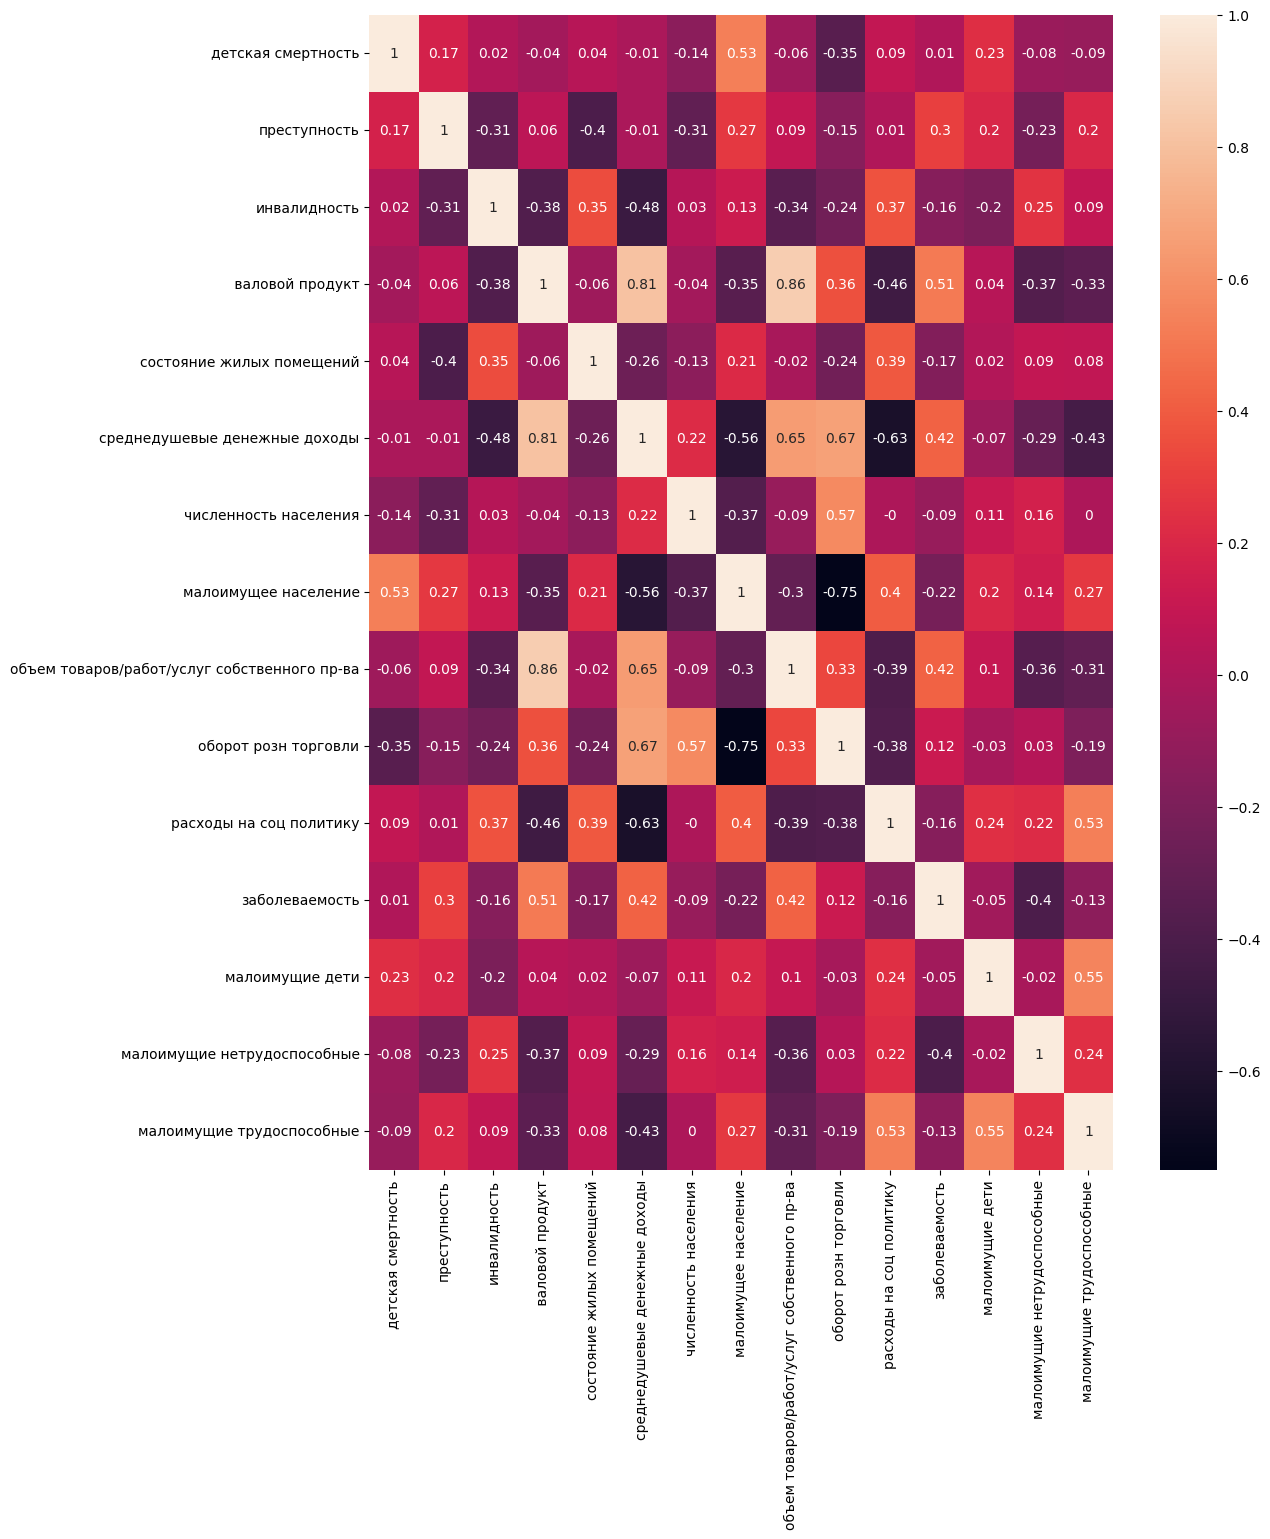

In [24]:
# Создаю тепловую карту корреляции признаков
plt.figure(figsize=(12, 15))
sns.heatmap(total.corr().round(decimals=2), annot=True)
plt.show()

Показатели оборот розничной торговли и малоимущее население имеют сильную обратную линейную зависимость (значение корреляции -0,75)  объем товаров/работ/услуг собственного пр-ва и валовой продукт имеют высокое значение корреляции - 0,86

Делаю выводы, что как минимум от 2х признаков можно будет избавиться перед кластеризацией.

Перед кластеризацией важно стандартизировать признаки, так как сильные различия в их диапазонах могут исказить структуру данных и снизить качество модели.

In [25]:
from sklearn import preprocessing
# инициализирую стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

total_scaled = s_scaler.fit_transform(total)
 
total_scaled = pd.DataFrame(total_scaled, columns=['детская смертность', 'преступность', 'инвалидность',
                    ' валовой продукт', 'состояние жилых помещений', 'среднедушевые денежные доходы', 
                    'численность населения', 'малоимущее население', 'объем товаров/работ/услуг собственного пр-ва', 
                    'оборот розн торговли', 'расходы на соц политику', 'заболеваемость', 'малоимущие дети',
                    'малоимущие нетрудоспособные', 'малоимущие трудоспособные'], index=total.index)
total_scaled

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
Регион,,,,,,,,,,,,,,,
Алтайский край,0.074915,1.158010,-0.125310,-0.424529,0.372196,-0.594927,0.344541,0.603775,-0.400407,-0.719576,1.492470,1.890835,0.034490,0.101217,0.620890
Амурская область,-0.130672,1.697601,0.316617,-0.198536,0.064190,0.062106,-0.521583,0.305945,-0.373476,0.652568,0.792516,0.197815,0.135583,-0.157997,0.603925
Архангельская область,-0.407391,0.530396,0.083461,-0.174902,-0.111814,0.129411,-0.347056,-0.238772,0.202466,0.836624,0.128922,1.145479,-0.517632,0.743080,0.926265
Астраханская область,0.271415,0.214618,-1.563014,-0.145266,0.900207,-0.510087,-0.399935,0.211893,-0.211554,-0.318912,1.160674,-0.882625,0.442750,-0.515959,0.430879
Белгородская область,-0.609523,-2.365904,2.732794,-0.053126,0.284194,0.049595,-0.099193,-1.332123,-0.042798,0.585960,-1.480065,-0.308291,-2.376185,0.113560,-4.064926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,0.419158,-0.328777,-2.425281,4.943664,-0.727827,3.796738,-0.664503,-1.688736,3.960762,1.214306,-1.848223,2.207617,1.613094,-2.416862,-0.067901
Ярославская область,-0.640838,-0.379390,0.311104,-0.199059,-0.595824,-0.209473,-0.260677,-0.795244,-0.242966,0.082174,0.151648,0.574911,-0.156031,-0.330806,0.909300
г. Москва,-0.289225,-1.718375,0.273774,0.922695,-1.475843,3.007086,6.057089,-1.465363,0.088508,3.823062,-1.002823,-0.885313,0.361098,1.891028,-0.149335


### Кластеризация

При кластеризации регионов России важно выбрать метод, который:

- Эффективно работает с числовыми данными (например, экономические, социальные или демографические показатели)
- Масштабируется на большой объем данных (85 субъектов РФ)
- Дает интерпретируемые и устойчивые результаты

K-means — оптимальный баланс между скоростью, интерпретируемостью и качеством кластеризации для регионов. Другие методы либо требуют больше ресурсов, либо менее устойчивы к разнородности данных.



Для кластеризации методом K-Means я подберу оптимальное количество кластеров с помощью метода локтя.

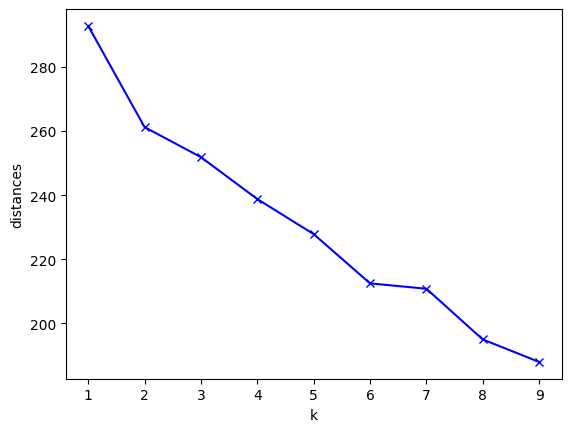

In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
 
# Задаю количество кластеров от 1 до 9
clusters = range(1, 10) 
distances_sum = []

for k in clusters:
    kmeans_model = KMeans(n_clusters = k).fit(total_scaled)
    distances_point = cdist(total_scaled, kmeans_model.cluster_centers_, 'euclidean')
     # сумма внутрикластерных расстояний, которую минимизирует K-Means
    distances_cluster = sum(np.min(distances_point,axis=1))
    distances_sum.append(distances_cluster)
 
# Визуализация
plt.plot(clusters, distances_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('distances')
plt.show()

Оптимальное количество кластеров — 6, так как на графике метода локтя изгиб наблюдается в диапазоне от 5 до 7

In [27]:
# убираю признаки объем товаров/работ/услуг собственного пр-ва и малоимущее население, исходя из тепловой карты
total_scaled = total_scaled[['детская смертность', 'преступность', 'инвалидность',
                      ' валовой продукт', 'состояние жилых помещений', 'среднедушевые денежные доходы', 
                      'численность населения', 'оборот розн торговли', 'расходы на соц политику', 
                      'заболеваемость', 'малоимущие дети', 'малоимущие нетрудоспособные', 'малоимущие трудоспособные']]
print(total_scaled.shape)

(85, 13)


In [28]:
from sklearn.cluster import KMeans
# Использую метод кластеризации KMeans
kmeans = KMeans(n_clusters=6, random_state=42) 
kmeans.fit(total_scaled)

y_kmeans = kmeans.predict(total_scaled)

total_scaled['labels'] = pd.Series(y_kmeans, index=total_scaled.index)


C:\Users\Администратор\AppData\Local\Temp\ipykernel_11448\1605371877.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_scaled['labels'] = pd.Series(y_kmeans, index=total_scaled.index)


Проверю значимы ли результаты.

Сначала проверю распределения на нормальность, затем проведу тесты.


In [29]:
from scipy.stats import shapiro

significant_features = ['детская смертность', 'преступность', 'инвалидность',
                      ' валовой продукт', 'состояние жилых помещений', 'среднедушевые денежные доходы', 
                      'численность населения', 'оборот розн торговли', 'расходы на соц политику', 
                      'заболеваемость', 'малоимущие дети', 'малоимущие нетрудоспособные', 'малоимущие трудоспособные'
]

# Проверка нормальности для каждого признака по кластерам
normality_results = []

for feature in significant_features:
    for cluster in sorted(total_scaled['labels'].unique()):
        cluster_data = total_scaled[total_scaled['labels'] == cluster][feature]
        stat, p = shapiro(cluster_data)
        normality_results.append({
            'Признак': feature,
            'Кластер': cluster,
            'Статистика': stat,
            'p-value': p,
            'Нормальное': p > 0.05
        })

# Результаты в таблице
normality_df = pd.DataFrame(normality_results)
print(normality_df.pivot(index='Признак', columns='Кластер', values='Нормальное'))

Кластер                            0      1      2      3     4      5
Признак                                                               
 валовой продукт               False  False   True   True  True   True
детская смертность             False  False   True   True  True   True
заболеваемость                 False   True   True   True  True   True
инвалидность                   False   True   True   True  True  False
малоимущие дети                False  False   True   True  True  False
малоимущие нетрудоспособные    False   True   True  False  True   True
малоимущие трудоспособные      False  False   True   True  True   True
оборот розн торговли           False   True   True   True  True   True
преступность                   False  False   True   True  True   True
расходы на соц политику        False  False   True   True  True   True
состояние жилых помещений      False   True   True   True  True  False
среднедушевые денежные доходы  False   True   True   True  True   True
числен

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11448\2624113959.py:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(cluster_data)


In [30]:
# Проверка для ненормальных признаков
from scipy.stats import kruskal

# Список признаков и их нормальность
features = {
    ' валовой продукт': False,
    'детская смертность': False,  
    'заболеваемость': False,       
    'инвалидность': False,         
    'малоимущие дети': False,     
    'малоимущие нетрудоспособные': False,
    'малоимущие трудоспособные': False,
    'оборот розн торговли': False,
    'преступность': False,
    'расходы на соц политику': False,
    'состояние жилых помещений': False,
    'среднедушевые денежные доходы': False,
    'численность населения': False
}


for feature, is_normal in features.items():
    if not is_normal:
        # Группирую данные по кластерам
        groups = [total_scaled[total_scaled['labels'] == k][feature] for k in total_scaled['labels'].unique()]
        
        # Краскел-Уоллис
        h, p_kw = kruskal(*groups)
        print(f"\n🔹 {feature}:")
        print(f"Краскел-Уоллис: H={h:.2f}, p={p_kw:.5f}")


🔹  валовой продукт:
Краскел-Уоллис: H=33.72, p=0.00000

🔹 детская смертность:
Краскел-Уоллис: H=15.27, p=0.00925

🔹 заболеваемость:
Краскел-Уоллис: H=20.88, p=0.00085

🔹 инвалидность:
Краскел-Уоллис: H=32.42, p=0.00000

🔹 малоимущие дети:
Краскел-Уоллис: H=14.60, p=0.01224

🔹 малоимущие нетрудоспособные:
Краскел-Уоллис: H=23.07, p=0.00033

🔹 малоимущие трудоспособные:
Краскел-Уоллис: H=26.22, p=0.00008

🔹 оборот розн торговли:
Краскел-Уоллис: H=27.01, p=0.00006

🔹 преступность:
Краскел-Уоллис: H=24.57, p=0.00017

🔹 расходы на соц политику:
Краскел-Уоллис: H=36.13, p=0.00000

🔹 состояние жилых помещений:
Краскел-Уоллис: H=21.35, p=0.00070

🔹 среднедушевые денежные доходы:
Краскел-Уоллис: H=29.30, p=0.00002

🔹 численность населения:
Краскел-Уоллис: H=36.26, p=0.00000


Кластеры статистически значимо различаются по большинству показателей (p < 0.01), особенно по:

- валовой продукт (H=33,72), доходы (H=29,3)

- малоимущие нетрудоспособные (H=26,22), преступность (H=24,57)

- заболеваемость (H=20,88), инвалидность (H=32.42)

Исключения:

Малоимущие дети (p=0,01224) — различия есть, но слабее, чем у других признаков

## 0 кластер

In [31]:
# 0 Кластер
total[total_scaled['labels']==0].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000
mean,0.000064,0.005140,0.547853,5.683900e+06,18.200000,78889.900000,292144.500000,7.850000,1.250592e+07,238937.916667,14.190000,128244.300000,42.17500,1.58750,43.712500
std,0.000010,0.001385,0.348928,1.024863e+06,3.818377,1795.909803,350905.511400,2.814285,3.107101e+06,25550.007176,1.513209,14124.316533,7.81353,0.76014,10.624279
min,0.000057,0.004161,0.301123,4.959213e+06,15.500000,77620.000000,44016.833333,5.860000,1.030887e+07,220871.333333,13.120000,118256.900000,36.65000,1.05000,36.200000
25%,0.000060,0.004651,0.424488,5.321557e+06,16.850000,78254.950000,168080.666667,6.855000,1.140739e+07,229904.625000,13.655000,123250.600000,39.41250,1.31875,39.956250
50%,0.000064,0.005140,0.547853,5.683900e+06,18.200000,78889.900000,292144.500000,7.850000,1.250592e+07,238937.916667,14.190000,128244.300000,42.17500,1.58750,43.712500
75%,0.000068,0.005630,0.671218,6.046244e+06,19.550000,79524.850000,416208.333333,8.845000,1.360444e+07,247971.208333,14.725000,133238.000000,44.93750,1.85625,47.468750
max,0.000071,0.006120,0.794582,6.408588e+06,20.900000,80159.800000,540272.166667,9.840000,1.470297e+07,257004.500000,15.260000,138231.700000,47.70000,2.12500,51.225000


In [32]:
cluster_0 = list(total[total_scaled['labels']==0].index)
print (', '.join(cluster_0))

Ненецкий автономный округ, Ямало-Ненецкий автономный округ


В 0 кластер попало 2 региона.

Он характеризуется высокой детской смертностью, а так же высокой заболеваемостью. 

Но при этом имеет самый высокий показатель среднедушевых доходов и объема товаров/работ/услуг собственного производства.

Так же, характерны высокая показатель малоимущих детей, самые низких расходы на соц политику.
И, что немаловажно, самый низкий процент малоимущего нетрудоспособного населения.

## 1 кластер

In [33]:
# 1 Кластер
total[total_scaled['labels']==1].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.000052,0.005391,0.981346,397313.321333,16.960000,25503.044444,1.430478e+06,14.692889,7.448333e+05,175698.125926,22.711111,83585.168889,37.108333,5.941111,54.173889
std,0.000012,0.001688,0.178888,106243.864640,1.384394,3690.980719,8.103757e+05,3.332717,3.871218e+05,31016.883454,2.868216,14102.825810,4.345308,1.450080,5.023524
min,0.000028,0.002880,0.624074,232553.000000,14.200000,17471.600000,2.742858e+05,8.740000,3.571610e+04,80533.000000,9.860000,54094.000000,25.025000,1.950000,38.675000
25%,0.000046,0.004125,0.875558,316003.900000,16.100000,23394.200000,8.403298e+05,12.980000,4.120641e+05,156672.833333,21.700000,71872.700000,34.950000,5.175000,53.250000
50%,0.000050,0.004941,0.943119,403979.140000,16.900000,24957.400000,1.145686e+06,14.280000,7.014505e+05,171871.333333,22.400000,86026.500000,38.100000,5.625000,55.000000
75%,0.000059,0.006436,1.103948,472009.740000,17.800000,27838.200000,1.947627e+06,16.040000,9.845614e+05,198305.500000,24.520000,93490.300000,39.600000,7.025000,56.600000
max,0.000081,0.009522,1.424725,770613.300000,20.200000,34028.400000,3.480168e+06,24.160000,1.719464e+06,236744.833333,27.820000,112764.700000,43.500000,9.500000,61.425000


In [34]:
cluster_1 = list(total[total_scaled['labels']==1].index)
print (', '.join(cluster_1))

Алтайский край, Амурская область, Архангельская область, Владимирская область, Волгоградская область, Вологодская область, Забайкальский край, Ивановская область, Иркутская область, Калининградская область, Калужская область, Кемеровская область — Кузбасс, Кировская область, Костромская область, Курганская область, Курская область, Липецкая область, Нижегородская область, Новгородская область, Новосибирская область, Омская область, Оренбургская область, Орловская область, Пензенская область, Пермский край, Псковская область, Республика Бурятия, Республика Калмыкия, Республика Карелия, Республика Коми, Республика Марий Эл, Республика Мордовия, Республика Хакасия, Рязанская область, Самарская область, Саратовская область, Тамбовская область, Тверская область, Томская область, Тульская область, Удмуртская Республика, Ульяновская область, Челябинская область, Чувашская Республика — Чувашия, Ярославская область


В 1 кластере видим 45 регионов, это самый большой кластер в исследовании.

Видим самые высокие показатели:
- малоимущих трудоспособных

Одни из самых высоких показателей:
- расходы на соц политику
- инвалидность
- преступность

Одни из самых низких показателей:
- среднедушевые денежные доходы
- валовой продукт на душу населения
- среднегодовой оборот розн торговли


## 2 кластер

In [35]:
# 2 Кластер
total[total_scaled['labels']==2].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.000087,0.002698,1.082756,238784.466000,20.000000,23420.500000,9.813738e+05,19.372000,205288.192518,155153.566667,24.748000,65985.710000,38.097500,8.532500,53.375000
std,0.000040,0.002044,0.185650,75439.847485,3.951933,3833.280995,8.297813e+05,5.887072,184702.579576,55533.273783,2.709394,11153.112586,3.945381,2.163172,2.937001
min,0.000048,0.000000,0.790262,134501.460000,13.800000,16238.800000,1.611782e+05,12.860000,20382.410587,50579.333333,19.980000,44792.000000,34.125000,3.875000,47.325000
25%,0.000053,0.000761,0.952475,187759.670000,18.450000,21499.350000,4.730107e+05,14.135000,61240.075032,129424.916667,23.085000,61247.550000,34.775000,7.287500,51.581250
50%,0.000069,0.003074,1.090719,227936.220000,19.300000,24336.800000,7.828547e+05,18.260000,143349.123800,162635.666667,24.480000,68309.750000,37.562500,9.325000,54.250000
75%,0.000120,0.003851,1.261600,294886.410000,21.775000,26390.150000,1.139892e+06,23.965000,284906.988133,192066.500000,27.190000,72183.475000,40.031250,9.637500,55.675000
max,0.000154,0.006337,1.312744,347564.940000,27.800000,27704.000000,3.075289e+06,29.960000,580494.271861,221616.000000,28.480000,80693.800000,46.025000,10.975000,56.225000


In [36]:
cluster_2 = list(total[total_scaled['labels']==2].index)
print (', '.join(cluster_2))


Брянская область, Еврейская автономная область, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Адыгея (Адыгея), Республика Дагестан, Республика Ингушетия, Республика Северная Осетия — Алания, Смоленская область, Чеченская Республика


Во 2 кластер определилось 10 регионов.

Этот кластер примечателен самым низким показателем среднедушевых доходов, валового продукта, объем товаров/работ/услуг собственного производства и среднегодовой оборот розн торговли.

Ниже среднего показателями: инвалидность, детская смертность

Большой показатель малоимущих нетрудоспособных и малоимущих трудоспособных

При этом, низкая преступность и заболеваемость

## 3 кластер

In [37]:
# 3 Кластер
total[total_scaled['labels']==3].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.000057,0.004617,0.767527,523976.996000,17.406667,32097.493333,3.068512e+06,12.497333,1.513605e+06,229403.644444,21.004000,70577.146667,40.965000,5.785000,53.240000
std,0.000009,0.001225,0.175433,176130.318691,1.572290,6762.105849,1.879415e+06,3.488797,2.894443e+06,44555.248707,4.038636,10558.206494,2.734499,1.505549,3.023624
min,0.000040,0.002812,0.458429,227127.240000,14.800000,20896.200000,7.492792e+05,7.040000,1.594867e+05,139504.166667,12.500000,52086.600000,36.225000,3.825000,47.275000
25%,0.000051,0.003490,0.675177,404436.730000,16.000000,29136.100000,1.706033e+06,10.100000,4.596945e+05,207629.583333,19.920000,64444.250000,39.600000,4.800000,50.987500
50%,0.000056,0.004660,0.755317,514011.280000,17.700000,30634.200000,2.799711e+06,12.380000,7.732413e+05,231990.833333,21.980000,70054.000000,40.375000,5.400000,54.425000
75%,0.000064,0.005530,0.885083,629377.530000,18.600000,35627.400000,4.131142e+06,14.480000,1.226564e+06,257112.500000,22.440000,78914.850000,42.187500,6.625000,55.200000
max,0.000073,0.006532,1.119428,807521.720000,19.900000,44515.000000,7.540752e+06,18.880000,1.185693e+07,326325.000000,26.960000,87319.000000,46.575000,8.525000,58.400000


In [38]:
cluster_3 = list(total[total_scaled['labels']==3].index)
print (', '.join(cluster_3))

Астраханская область, Воронежская область, Краснодарский край, Красноярский край, Московская область, Мурманская область, Приморский край, Республика Башкортостан, Республика Крым, Республика Татарстан (Татарстан), Ростовская область, Свердловская область, Ставропольский край, Тюменская область, Хабаровский край


В 3 кластер попало 15 регионов.

Его особенность - высокие проценты малоимущих детей и малоимущих трудоспособных.

Остальные показатели - близки к средним.

## 4 кластер

In [39]:
# 4 Кластер
total[total_scaled['labels']==4].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000,4.00000,4.00000,4.000000,4.000000
mean,0.000042,0.001513,1.204874,8.750092e+05,16.075000,44195.050000,5.311788e+06,7.620000,1.253130e+06,283206.458333,16.135,76855.75000,21.85000,6.062500,34.612500
std,0.000009,0.001140,0.322854,3.967429e+05,1.746186,18264.294427,5.109792e+06,0.935521,1.803495e+05,79368.162672,0.990,16986.73309,12.63568,2.993917,11.980444
min,0.000029,0.000000,0.906804,5.787651e+05,13.800000,30997.600000,1.548451e+06,6.880000,1.055731e+06,223298.666667,14.740,64633.30000,12.62500,2.450000,21.775000
25%,0.000039,0.000992,0.965074,6.001038e+05,15.225000,31166.200000,1.762243e+06,6.970000,1.133127e+06,231923.041667,15.775,66148.75000,12.96250,5.000000,29.106250
50%,0.000043,0.001718,1.152798,7.435252e+05,16.350000,37967.800000,3.585545e+06,7.340000,1.248884e+06,256291.666667,16.480,70645.65000,17.56250,6.012500,33.025000
75%,0.000045,0.002239,1.392599,1.018430e+06,17.200000,50996.650000,7.135090e+06,7.990000,1.368887e+06,307575.083333,16.840,81352.65000,26.45000,7.075000,38.531250
max,0.000052,0.002614,1.607097,1.434221e+06,17.800000,69847.000000,1.252761e+07,8.920000,1.459020e+06,396943.833333,16.840,101498.40000,39.65000,9.775000,50.625000


In [40]:
cluster_4 = list(total[total_scaled['labels']==4].index)
print (', '.join(cluster_4))

Белгородская область, Ленинградская область, г. Москва, г. Санкт-Петербург


4 кластер наполнился 4 регионами.

- самые низкие показатели малоимущих детей, малоимущих трудоспособных и малоимущего населения

- низкая детская смертность, преступность

- самый высокий уровень инвалидности

- самый высокий среднегодовой оборот розн торговли

In [41]:
# 5 Кластер
total[total_scaled['labels']==5].describe()

,детская смертность,преступность,инвалидность,валовой продукт,состояние жилых помещений,среднедушевые денежные доходы,численность населения,малоимущее население,объем товаров/работ/услуг собственного пр-ва,оборот розн торговли,расходы на соц политику,заболеваемость,малоимущие дети,малоимущие нетрудоспособные,малоимущие трудоспособные
count,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.000082,0.006179,0.597122,1.128813e+06,14.788889,44553.888889,5.122884e+05,15.793333,2.058212e+06,199882.592593,14.335556,83860.555556,37.313889,4.272222,44.511111
std,0.000059,0.002342,0.260898,8.001903e+05,1.367886,20150.362232,5.048869e+05,8.946904,1.848337e+06,72799.387916,4.034734,23319.946256,9.264491,1.742414,9.050579
min,0.000000,0.002710,0.363302,2.217983e+05,13.600000,16234.600000,4.980083e+04,8.480000,8.752226e+04,76138.500000,6.480000,52350.600000,24.475000,0.675000,24.850000
25%,0.000042,0.004633,0.421886,2.648348e+05,13.800000,28684.200000,2.183720e+05,9.480000,1.751077e+05,154164.500000,12.880000,67012.900000,28.550000,3.725000,40.725000
50%,0.000072,0.006346,0.529341,1.099324e+06,14.100000,49194.800000,3.230138e+05,11.200000,1.838836e+06,197298.333333,14.260000,83995.500000,41.550000,4.400000,48.200000
75%,0.000137,0.007216,0.649083,1.780297e+06,15.900000,54707.600000,4.880557e+05,18.620000,3.761543e+06,243120.833333,15.520000,90676.100000,45.375000,5.425000,49.925000
max,0.000166,0.010495,1.203843,2.302429e+06,17.200000,78492.600000,1.659005e+06,34.760000,5.041427e+06,316650.833333,21.400000,128506.500000,46.725000,6.575000,55.450000


In [42]:
cluster_5 = list(total[total_scaled['labels']==5].index)
print (', '.join(cluster_5))

Камчатский край, Магаданская область, Республика Алтай, Республика Саха (Якутия), Республика Тыва (Тува), Сахалинская область, Ханты-Мансийский автономный округ — Югра, Чукотский автономный округ, г. Севастополь


В 5 кластере наблюдаются 9 регионов. Он характерен:

- высокой детской смертностью и преступностью
- самой низкой жилой площадью 
- высоким процентом малоимущего населения
- низкими расходами на соц политику

## Выводы

1) Исходя из данных, которые получились, на уровень бедности в регионе в большей степени влияют:
- объем товаров/работ/услуг собственного производства. Чем он выше, тем ниже уровень бедности.
- среднегодовой оборот розничной торговли. Чем он выше, тем ниже уровень бедности.
- валовой продукт на душу населения. Чем он выше, тем ниже уровень бедности.
2) При этом регионы с высоким уровнем малоимущего населения тратится больше на социальную политику, возможно, чтобы оказать тем самым поддержку населению.
3) Наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения регионы, попавшие в кластеры 1, 2 и 3.
4) Все исследуемые группы населения в зависимости от кластера сталкиваются с бедностью.
5) Число малоимущих детей, инвалидов, малоимущих трудоспособных и малоимущих нетрудоспособных влияет на уровень бедности в регионе.
Это хорого видно по показателям 1, 2 и 3 кластера. И наоборот, 0 и 4 кластер показывают обратную зависимость.
6) Уровень бедности/социального благополучия напрямую связан с производством и потреблением в регионе. 